In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.utils import to_categorical
plt.style.use("ggplot")

In [2]:
mnistData = load_data()

In [3]:
mnistData

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [4]:
(x_train,y_train),(x_test,y_test) = mnistData

In [5]:
x_train.shape,x_test.shape,y_test.shape , y_test.shape

((60000, 28, 28), (10000, 28, 28), (10000,), (10000,))

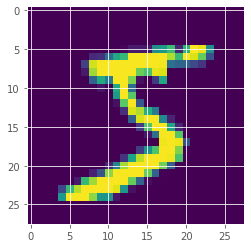

In [6]:
plt.imshow(x_train[0])   # [면, 행, 열]
plt.show()

In [7]:
y_train[0]

5

In [8]:
y_train  # y값을 인코딩해야함.

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [9]:
y_trainOne = to_categorical(y_train)
y_trainOne

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [10]:
x_train.shape

(60000, 28, 28)

In [11]:
x_trainM = x_train.reshape(60000,-1, )  # 2차원으로 변경
x_trainM.shape

(60000, 784)

In [12]:
model = Sequential()
model.add(Dense(units=64, input_dim = 784, activation='relu' )  )
model.add(Dense(units=32, input_dim = 64, activation='relu' )  )
model.add(Dense(units=10, input_dim = 32, activation='softmax' )  )

model.compile(loss = 'categorical_crossentropy',optimizer='adam',metrics=['acc'])
model.fit(x_trainM, y_trainOne,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 1s 623us/step - loss: 1.7113 - acc: 0.6338
Epoch 2/10
1875/1875 [==============================] - 1s 566us/step - loss: 0.5328 - acc: 0.8568
Epoch 3/10
1875/1875 [==============================] - 1s 588us/step - loss: 0.3066 - acc: 0.9219
Epoch 4/10
1875/1875 [==============================] - 1s 573us/step - loss: 0.2241 - acc: 0.9410
Epoch 5/10
1875/1875 [==============================] - 1s 586us/step - loss: 0.1963 - acc: 0.9476
Epoch 6/10
1875/1875 [==============================] - 1s 587us/step - loss: 0.1684 - acc: 0.9548
Epoch 7/10
1875/1875 [==============================] - 1s 576us/step - loss: 0.1475 - acc: 0.9587
Epoch 8/10
1875/1875 [==============================] - 1s 566us/step - loss: 0.1321 - acc: 0.9643
Epoch 9/10
1875/1875 [==============================] - 1s 580us/step - loss: 0.1222 - acc: 0.9656
Epoch 10/10
1875/1875 [==============================] - 1s 575us/step - loss: 0.1141 - acc: 0.9687


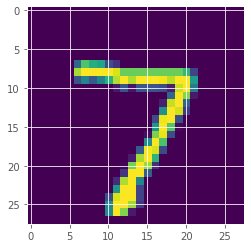

In [13]:
plt.imshow(x_test[0])

In [14]:
x_test[0].shape

(28, 28)

In [15]:
model.predict( x_test[0].reshape(1,-1)).argmax(axis=1) 

array([7], dtype=int64)

In [16]:
x_test.shape, y_test.shape     #  x_test를 수정해야함

((10000, 28, 28), (10000,))

In [17]:
y_test[0]

7

In [18]:
x_test.reshape(-1,28*28)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [19]:
x_test.reshape(-1,28*28).argmax(axis=1)

array([355,  97, 406, ..., 711, 464,  75], dtype=int64)

In [20]:
y_test = to_categorical(y_test)

In [21]:
model.evaluate(x_test.reshape(-1,28*28),y_test)

313/313 [==============================] - 0s 526us/step - loss: 0.1786 - acc: 0.9521


[0.17864486575126648, 0.9520999789237976]

In [22]:
mnistData = load_data()

(x_train,y_train),(x_test,y_test) = mnistData

x_train.shape

(60000, 28, 28)


 # onehot인코딩 안하는 방법
 ## Flatten -> 1차원
 ## sparse_categorical_crossentropy

In [23]:
model = Sequential()
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(units=64,  activation='relu' )  )
model.add(Dense(units=32,  activation='relu' )  )
model.add(Dense(units=10,  activation='softmax' )  )

model.compile(loss = 'sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])
model.fit(x_train, y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 1s 665us/step - loss: 1.6990 - acc: 0.7749
Epoch 2/10
1875/1875 [==============================] - 1s 593us/step - loss: 0.3992 - acc: 0.8954
Epoch 3/10
1875/1875 [==============================] - 1s 583us/step - loss: 0.2623 - acc: 0.9281
Epoch 4/10
1875/1875 [==============================] - 1s 593us/step - loss: 0.2076 - acc: 0.9429
Epoch 5/10
1875/1875 [==============================] - 1s 593us/step - loss: 0.1735 - acc: 0.9510
Epoch 6/10
1875/1875 [==============================] - 1s 585us/step - loss: 0.1563 - acc: 0.9568
Epoch 7/10
1875/1875 [==============================] - 1s 591us/step - loss: 0.1388 - acc: 0.9618
Epoch 8/10
1875/1875 [==============================] - 1s 601us/step - loss: 0.1272 - acc: 0.9648
Epoch 9/10
1875/1875 [==============================] - 1s 598us/step - loss: 0.1149 - acc: 0.9686
Epoch 10/10
1875/1875 [==============================] - 1s 595us/step - loss: 0.1061 - acc: 0.9714


In [24]:
model.predict( x_test )

array([[1.63298211e-08, 8.46469295e-09, 4.58227987e-06, ...,
        9.99963880e-01, 1.62059539e-08, 6.93516489e-09],
       [1.92750605e-07, 5.88898511e-05, 9.99896646e-01, ...,
        2.20098832e-06, 6.38638448e-06, 5.54641742e-25],
       [3.16361086e-23, 1.00000000e+00, 5.93466113e-14, ...,
        1.27822150e-27, 4.68795358e-19, 7.86854644e-16],
       ...,
       [4.69429140e-12, 5.30438315e-09, 1.76920576e-08, ...,
        5.62429886e-06, 2.36957037e-10, 4.71415342e-06],
       [1.42447627e-15, 1.58174684e-21, 7.20035884e-23, ...,
        3.81009678e-19, 1.27445464e-05, 1.25932069e-11],
       [9.81488120e-06, 1.00015416e-15, 2.29277014e-12, ...,
        1.91627072e-37, 2.44347675e-09, 1.04836506e-14]], dtype=float32)

In [25]:
x_test

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [26]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [27]:
x_test[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [28]:
x_test[0].shape

(28, 28)

In [29]:
x_test[0].reshape(1,28,28).argmax(axis=1)

array([[ 0,  0,  0,  0,  0,  0,  8,  8,  8,  8,  8, 25,  9, 21,  9,  9,
         9, 15, 13, 12,  9,  9,  0,  0,  0,  0,  0,  0]], dtype=int64)

In [30]:
model.predict(x_test[0].reshape(1,28,28)).argmax(axis=1)

array([7], dtype=int64)

In [31]:
model.predict(x_test).argmax(axis=1) # => x 전체 예측값

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [32]:
model.evaluate(x_test,y_test) # 손실, 정확도

313/313 [==============================] - 0s 475us/step - loss: 0.1651 - acc: 0.9596


[0.16505897045135498, 0.9595999717712402]

# 텐서


In [33]:
mnistData = load_data()

(x_train,y_train),(x_test,y_test) = mnistData

x_train.shape

(60000, 28, 28)

In [34]:
x_trainM = x_train.reshape(60000, -1 )  
x_trainM.shape

(60000, 784)

In [35]:
y_trainOne = to_categorical(y_train)
y_trainOne

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [36]:
x_trainM = tf.cast(x_trainM, dtype=tf.float32)

In [37]:
y_train.shape

(60000,)

In [38]:
x_trainM.shape, y_trainOne.shape

(TensorShape([60000, 784]), (60000, 10))

In [39]:
# x = tf.constant(x_trainM, tf.float32)
# y= tf.constant(y_trainOne, tf.float32)

In [40]:
initX = tf.initializers.GlorotUniform()
w1 = tf.Variable(initX(shape=[784,64]))
b1 = tf.Variable(initX(shape = [64]))
w2 = tf.Variable( initX( shape=[64,32] ) )
b2 = tf.Variable( initX( shape=[32] ) )
w3 = tf.Variable( initX( shape=[32,10] ) ) #1은 남겨야 한다.
b3 = tf.Variable( initX( shape=[10] ) ) 

In [41]:
def compute_loss():
    z1 = tf.matmul( x_trainM, w1) + b1
    hx1 = tf.nn.relu( z1 ) 
    z2 = tf.matmul( hx1, w2 ) + b2
    hx2 = tf.nn.relu( z2 )
    z = tf.matmul( hx2, w3 ) + b3
    
    cost_i = tf.nn.softmax_cross_entropy_with_logits( logits=z, labels = y_trainOne)
    cost = tf.reduce_mean( cost_i)
    return cost

# 1000번이라 오래걸림

In [42]:
optimizer = Adam( learning_rate=0.01)
for i in range(1000):
    optimizer.minimize( compute_loss, var_list=[w1,w2,w3, b1,b2,b3])
    print( i, compute_loss().numpy() )

0 106.50827
1 61.398033
2 33.679443
3 31.595371
4 16.891808
5 7.3657374
6 5.147398
7 3.92007
8 2.8514998
9 2.3878224
10 2.3266437
11 2.346018
12 2.3535948
13 2.342696
14 2.3280525
15 2.3156304
16 2.3075657
17 2.3018641
18 2.296574
19 2.2903793
20 2.2837245
21 2.276526
22 2.2686167
23 2.2617488
24 2.2558236
25 2.2505722
26 2.2458997
27 2.2434938
28 2.2438645
29 2.245756
30 2.246939
31 2.2451448
32 2.240079
33 2.2337444
34 2.2283614
35 2.2251847
36 2.2231362
37 2.221751
38 2.2203689
39 2.2189114
40 2.217225
41 2.2152917
42 2.2130876
43 2.2105496
44 2.2077239
45 2.2047281
46 2.2016797
47 2.1986089
48 2.1962588
49 2.194289
50 2.192801
51 2.1914198
52 2.1896555
53 2.187193
54 2.1844676
55 2.1820314
56 2.1800945
57 2.1784258
58 2.176825
59 2.175181
60 2.1733963
61 2.1714437
62 2.1694345
63 2.1674254
64 2.1654983
65 2.1638262
66 2.1623232
67 2.1608248
68 2.1591735
69 2.1573584
70 2.1555276
71 2.1538525
72 2.1523058
73 2.1508658
74 2.1493938
75 2.1478672
76 2.1463766
77 2.144911
78 2.1435564
7

603 1.853857
604 1.8531482
605 1.8524542
606 1.8517624
607 1.8510513
608 1.8503499
609 1.8496474
610 1.8489499
611 1.8482485
612 1.8475711
613 1.846912
614 1.8462687
615 1.8456258
616 1.8449461
617 1.8442343
618 1.8434949
619 1.8427844
620 1.8420497
621 1.8413054
622 1.8405573
623 1.839842
624 1.839195
625 1.8385696
626 1.8379623
627 1.837339
628 1.836718
629 1.836077
630 1.835476
631 1.8348761
632 1.8342707
633 1.8336638
634 1.8330457
635 1.8324336
636 1.8318253
637 1.8312174
638 1.8305982
639 1.8299806
640 1.8293611
641 1.8287479
642 1.8281604
643 1.8275776
644 1.8270093
645 1.826403
646 1.8257412
647 1.8250996
648 1.8244929
649 1.8239028
650 1.8233256
651 1.8226831
652 1.8220482
653 1.8214626
654 1.8209335
655 1.8204223
656 1.8198029
657 1.8191224
658 1.8184586
659 1.817877
660 1.817335
661 1.8167692
662 1.8161315
663 1.8155186
664 1.8148355
665 1.814132
666 1.8134966
667 1.8129249
668 1.812338
669 1.8116951
670 1.8110389
671 1.8104166
672 1.8098198
673 1.8092153
674 1.8085978
675 1

In [43]:
def hxfn(xdata):
    xd = tf.constant(xdata, tf.float32)
    z1 = tf.matmul(xd, w1)+b1
    hx1 = tf.nn.relu( z1 ) 
    z2 = tf.matmul( hx1, w2 ) + b2
    hx2 = tf.nn.relu( z2 )
    z = tf.matmul( hx2, w3 ) + b3
    hx = tf.nn.softmax(z)
    return(hx.numpy()>0.5) +0

In [44]:
pred = hxfn(x_trainM).argmax(axis = 1)

In [45]:
(pred ==y_train).mean()

0.45243333333333335